In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(40.719448663520524, -145.81739077268813),
 (4.529737535215759, 47.40300850223704),
 (51.41795445503817, -170.0964438553178),
 (23.315540889374816, -32.78922840078184),
 (41.302266585323224, -153.8924047304133),
 (37.85802314249278, 132.43314901784555),
 (-41.04705603060352, 58.28706847883737),
 (8.770070164368917, 103.8584819416248),
 (-86.30917656683135, -123.22902881977299),
 (18.046374734434238, -42.05561964347331),
 (10.639530542118834, 137.42133175282459),
 (-66.27394350153743, 129.76915917765695),
 (-63.861453173789855, -88.05296784071736),
 (-35.16399434009629, -79.71221303700095),
 (20.46497343551782, -165.2005045191901),
 (-53.21081459177662, 77.66391601357083),
 (22.51825931130996, 154.306645047914),
 (77.90918937336491, -139.9551068626124),
 (5.255520619486134, 44.54570335892495),
 (11.762405622882198, -167.53481388029618),
 (69.80061712465627, 117.42444571424119),
 (60.47855725963743, -94.53047197594854),
 (63.32037714134083, -143.76462092200626),
 (61.50245993470523, 64.

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print((cities))

['kodiak', 'hobyo', 'bethel', 'ponta do sol', 'sakaiminato', 'taolanaro', 'ca mau', 'punta arenas', 'cayenne', 'airai', 'new norfolk', 'lebu', 'kapaa', 'mahebourg', 'katsuura', 'aklavik', 'xuddur', 'saskylakh', 'thompson', 'fairbanks', 'kommunisticheskiy', 'provideniya', 'faanui', 'hobart', 'bredasdorp', 'vaini', 'tiksi', 'gat', 'lakota', 'lorengau', 'butaritari', 'busselton', 'belushya guba', 'east london', 'ushuaia', 'imbituba', 'ati', 'fakel', 'stornoway', 'piet retief', 'nanortalik', 'iqaluit', 'te anau', 'dingle', 'amderma', 'tumannyy', 'rawannawi', 'illoqqortoormiut', 'miandrivazo', 'torbay', 'atuona', 'puerto ayora', 'rikitea', 'ust-ishim', 'dikson', 'grindavik', 'carnarvon', 'saint-philippe', 'palmas bellas', 'avera', 'lavrentiya', 'clyde river', 'buin', 'tarata', 'yagodnoye', 'port macquarie', 'kisangani', 'makubetsu', 'archidona', 'salalah', 'dongsheng', 'cape town', 'normandin', 'kaitangata', 'coahuayana', 'moron', 'castro', 'asau', 'muyezerskiy', 'kurchum', 'monte alegre de

In [5]:
# create an empty list for weather data
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    print(i)
    if (i % 50==0 and i >= 50):
        set_count += 1
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
     # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | kodiak
1
Processing Record 2 of Set 1 | hobyo
2
Processing Record 3 of Set 1 | bethel
3
Processing Record 4 of Set 1 | ponta do sol
4
Processing Record 5 of Set 1 | sakaiminato
5
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
6
Processing Record 7 of Set 1 | ca mau
7
Processing Record 8 of Set 1 | punta arenas
8
Processing Record 9 of Set 1 | cayenne
9
Processing Record 10 of Set 1 | airai
10
Processing Record 11 of Set 1 | new norfolk
11
Processing Record 12 of Set 1 | lebu
12
Processing Record 13 of Set 1 | kapaa
13
Processing Record 14 of Set 1 | mahebourg
14
Processing Record 15 of Set 1 | katsuura
15
Processing Record 16 of Set 1 | aklavik
16
Processing Record 17 of Set 1 | xuddur
17
Processing Record 18 of Set 1 | saskylakh
18
Processing Record 19 of Set 1 | thompson
19
Processing Record 20 of Set 1 | fairbanks
20
Processing Record 21 of Set 1 | kommunisticheskiy
21


In [6]:
print(len(city_data))

567


In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.79,-152.41,41.00,56,75,8.05,US,2020-10-28 21:16:55
1,Hobyo,5.35,48.53,79.36,81,76,10.54,SO,2020-10-28 21:17:35
2,Bethel,41.37,-73.41,53.60,87,90,4.70,US,2020-10-28 21:15:50
3,Ponta Do Sol,32.67,-17.10,68.00,72,40,5.82,PT,2020-10-28 21:16:12
4,Sakaiminato,35.55,133.23,55.40,93,75,3.36,JP,2020-10-28 21:24:37
5,Ca Mau,9.18,105.15,76.68,91,100,5.77,VN,2020-10-28 21:24:37
6,Punta Arenas,-53.15,-70.92,48.20,61,75,18.34,CL,2020-10-28 21:15:54
7,Cayenne,4.93,-52.33,84.20,74,75,3.36,GF,2020-10-28 21:17:11
8,Airai,-8.93,125.41,59.72,77,69,2.19,TL,2020-10-28 21:16:39
9,New Norfolk,-42.78,147.06,54.00,67,5,1.83,AU,2020-10-28 21:16:47


In [8]:
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_order_column] 
city_data_df .head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-10-28 21:16:55,57.79,-152.41,41.00,56,75,8.05
1,Hobyo,SO,2020-10-28 21:17:35,5.35,48.53,79.36,81,76,10.54
2,Bethel,US,2020-10-28 21:15:50,41.37,-73.41,53.60,87,90,4.70
3,Ponta Do Sol,PT,2020-10-28 21:16:12,32.67,-17.10,68.00,72,40,5.82
4,Sakaiminato,JP,2020-10-28 21:24:37,35.55,133.23,55.40,93,75,3.36
5,Ca Mau,VN,2020-10-28 21:24:37,9.18,105.15,76.68,91,100,5.77
6,Punta Arenas,CL,2020-10-28 21:15:54,-53.15,-70.92,48.20,61,75,18.34
7,Cayenne,GF,2020-10-28 21:17:11,4.93,-52.33,84.20,74,75,3.36
8,Airai,TL,2020-10-28 21:16:39,-8.93,125.41,59.72,77,69,2.19
9,New Norfolk,AU,2020-10-28 21:16:47,-42.78,147.06,54.00,67,5,1.83


In [10]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [11]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

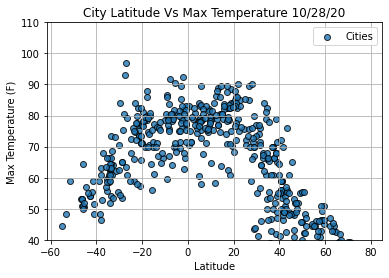

In [13]:
import time
plt.scatter(lats, max_temps, alpha=0.8, edgecolor="Black", linewidths=1, marker="o", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(40,110)
plt.title(f"City Latitude Vs Max Temperature " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

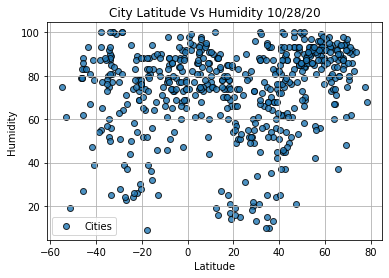

In [14]:
# Scatter plot for latitide vs humidity
plt.scatter(lats, humidity, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

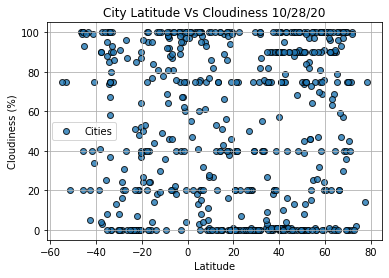

In [15]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, cloudiness, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

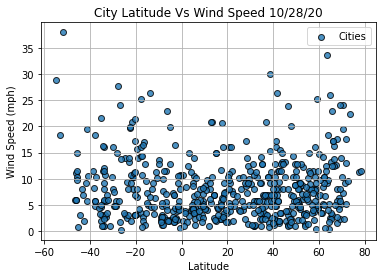

In [16]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
(slope, intercept, r_value, p_value, std_err)

(-0.4003298317449193,
 66.55323937945182,
 -0.6260155849258935,
 5.032709001108681e-63,
 0.020979623445242925)

In [18]:
# Get the equation of the line.
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)
print(f"p value is {p_value:.2f}")

y =-0.4x +66.55
p value is 0.00


In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(slope*lat) + intercept for lat in lats]
regress_values

[43.418178402912936,
 64.41147477961651,
 49.99159424016452,
 53.47446377634531,
 52.32151386091994,
 62.87821152403347,
 87.83076993669428,
 64.57961330894938,
 70.12818477693395,
 83.67934958149948,
 81.6136476496957,
 57.71395669452401,
 74.72397124536563,
 52.48965239025281,
 39.24273825781343,
 64.90388047266276,
 37.761517880357225,
 44.238854557990024,
 40.59585308911126,
 41.8608953574252,
 40.78000481171392,
 73.1506750066081,
 83.71938256467396,
 80.37662846960389,
 75.04023181244412,
 37.85359374165856,
 53.89881339799493,
 64.21130986374405,
 67.36190563957656,
 65.32422679599492,
 80.02433821766836,
 79.77213042366907,
 88.4913141590734,
 77.85855382792835,
 61.26087900378399,
 43.482231175992126,
 43.25003987358007,
 77.3661481348821,
 42.477403298312375,
 41.03221260571322,
 84.73622033730607,
 62.14961123025771,
 74.36767769511265,
 47.46951630017152,
 70.47647173055203,
 66.84948345494307,
 75.80886508939436,
 43.45821138608743,
 37.1249934478828,
 40.99618292085617,
 

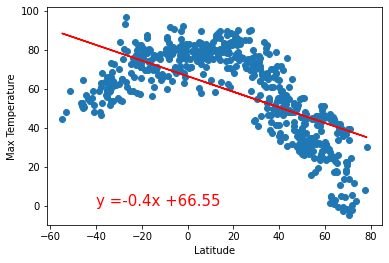

In [20]:
# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(-40,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values,title,y_label,text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    regress_values = [(slope*x) + intercept for x in x_values]
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

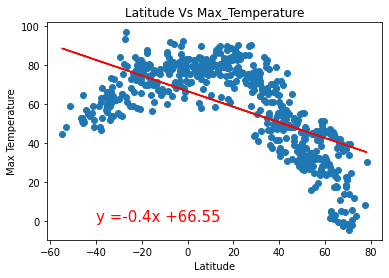

In [22]:
plot_linear_regression(lats,max_temps,"Latitude Vs Max_Temperature", "Max Temperature", (-40,0))

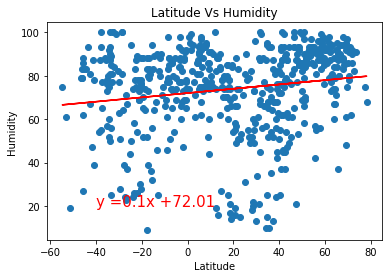

In [23]:
plot_linear_regression(lats,humidity,"Latitude Vs Humidity", "Humidity", (-40, 20))

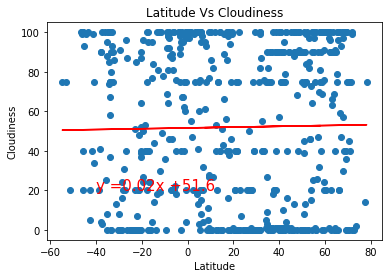

In [24]:
plot_linear_regression(lats,cloudiness,"Latitude Vs Cloudiness", "Cloudiness", (-40, 20))

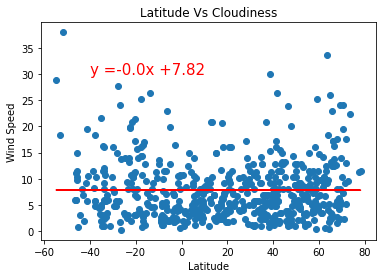

In [25]:
plot_linear_regression(lats,wind_speed,"Latitude Vs Cloudiness", "Wind Speed", (-40, 30))

In [26]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-10-28 21:16:55,57.79,-152.41,41.00,56,75,8.05
1,Hobyo,SO,2020-10-28 21:17:35,5.35,48.53,79.36,81,76,10.54
2,Bethel,US,2020-10-28 21:15:50,41.37,-73.41,53.60,87,90,4.70
3,Ponta Do Sol,PT,2020-10-28 21:16:12,32.67,-17.10,68.00,72,40,5.82
4,Sakaiminato,JP,2020-10-28 21:24:37,35.55,133.23,55.40,93,75,3.36
5,Ca Mau,VN,2020-10-28 21:24:37,9.18,105.15,76.68,91,100,5.77
6,Punta Arenas,CL,2020-10-28 21:15:54,-53.15,-70.92,48.20,61,75,18.34
7,Cayenne,GF,2020-10-28 21:17:11,4.93,-52.33,84.20,74,75,3.36
8,Airai,TL,2020-10-28 21:16:39,-8.93,125.41,59.72,77,69,2.19
9,New Norfolk,AU,2020-10-28 21:16:47,-42.78,147.06,54.00,67,5,1.83


In [27]:
index13 = city_data_df.loc[13]
index13.dtypes

dtype('O')

In [28]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-10-28 21:16:55,57.79,-152.41,41.00,56,75,8.05
1,Hobyo,SO,2020-10-28 21:17:35,5.35,48.53,79.36,81,76,10.54
2,Bethel,US,2020-10-28 21:15:50,41.37,-73.41,53.60,87,90,4.70
3,Ponta Do Sol,PT,2020-10-28 21:16:12,32.67,-17.10,68.00,72,40,5.82
4,Sakaiminato,JP,2020-10-28 21:24:37,35.55,133.23,55.40,93,75,3.36


In [31]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Punta Arenas,CL,2020-10-28 21:15:54,-53.15,-70.92,48.20,61,75,18.34
8,Airai,TL,2020-10-28 21:16:39,-8.93,125.41,59.72,77,69,2.19
9,New Norfolk,AU,2020-10-28 21:16:47,-42.78,147.06,54.00,67,5,1.83
10,Lebu,CL,2020-10-28 21:16:25,-37.62,-73.65,52.97,65,3,18.45
12,Mahebourg,MU,2020-10-28 21:15:53,-20.41,57.70,71.01,76,64,3.00


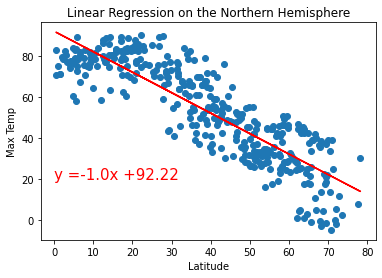

In [32]:
# Perform linear regression on Souther hemispear
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_temp, "Linear Regression on the Northern Hemisphere", "Max Temp", (0,20))

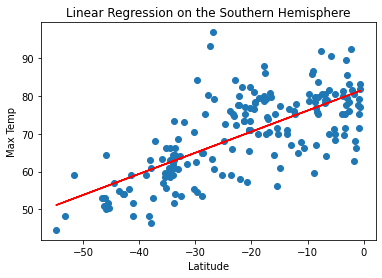

In [34]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_temp, "Linear Regression on the Southern Hemisphere", "Max Temp", (-50,40))

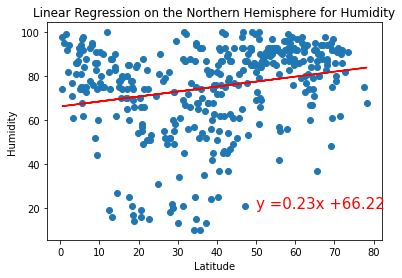

In [35]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_humid = northern_hemi_df["Humidity"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_humid, "Linear Regression on the Northern Hemisphere for" +
                       " Humidity", "Humidity", (50,20))

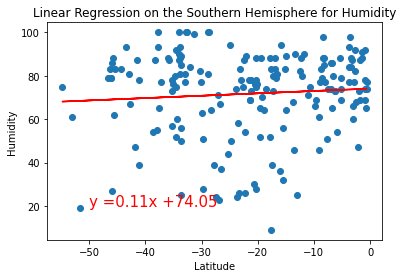

In [36]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_humid = southern_hemi_df["Humidity"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_humid, "Linear Regression on the Southern Hemisphere for Humidity", "Humidity", (-50,20))

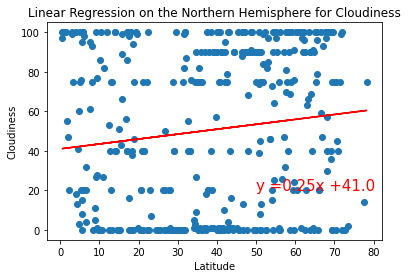

In [37]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_cloudiness, "Linear Regression on the Northern Hemisphere for" +
                       " Cloudiness", "Cloudiness", (50,20))

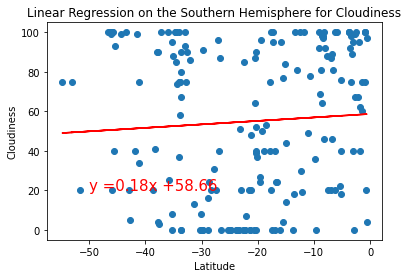

In [38]:
# Perform linear regression on Southern hemispear
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_cloudiness, "Linear Regression on the Southern Hemisphere for Cloudiness", "Cloudiness", (-50,20))